## Project No. 1

### Programming Assignment: Sentiment Analysis using N-grams

+ Esteban Berumen 

+ Mariana Salome 

+ Isabel Valladolid

In [1]:
import pandas as pd
import numpy as np
import nltk
import ssl
import certifi
import spacy
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
import seaborn as sns

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

ssl._create_default_https_context = lambda: ssl.create_default_context(cafile=certifi.where())

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/isabelvalladolid/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/isabelvalladolid/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/isabelvalladolid/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [2]:
df = pd.read_csv('IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


#### Preprocesing

In [3]:
def preprocess_text(text):
    # convertir a minusculas
    text = text.lower()
    # elimina HTML tags
    text = re.sub(r'<.*?>', '', text)
    # eliina caracteres especiales y puntuacion
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokeniza el texto
    tokens = word_tokenize(text)
    # Elimina stopwords
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)

# aplicar preprocesamiento
df['review'] = df['review'].apply(preprocess_text)

# mapear etiquetas a 0 y 1
df["label"] = df["sentiment"].map({"negative": 0, "positive": 1})

In [4]:
# train/val/test
X_train, X_temp, y_train, y_temp = train_test_split(df['review'], df["label"], test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

### Feature Extraction

In [13]:
from sklearn.pipeline import Pipeline

def extract_features(X_train, X_val, X_test, ngram_range=(1, 3), use_tfidf=True):
    if use_tfidf:
        vectorizer = Pipeline([
            ('count', CountVectorizer(
                ngram_range=ngram_range,
                max_features=5000,
                min_df=5,
                max_df=0.8
            )),
            ('tfidf', TfidfTransformer())
        ])
    else:
        vectorizer = CountVectorizer(
            ngram_range=ngram_range,
            max_features=5000,
            min_df=5,
            max_df=0.8
        )

    X_train_vec = vectorizer.fit_transform(X_train)
    X_val_vec = vectorizer.transform(X_val)
    X_test_vec = vectorizer.transform(X_test)

    return X_train_vec, X_val_vec, X_test_vec, vectorizer

# Ejemplo: usar n-gramas de 1 a 3 con TF-IDF
X_train_comb, X_val_comb, X_test_comb, vec_comb = extract_features(
    X_train, X_val, X_test, ngram_range=(1, 3), use_tfidf=True
)

### Train and evaluate models


 Entrenando Naive Bayes con n-grams (1,3)

Classification Report:
              precision    recall  f1-score   support

    Negative       0.86      0.84      0.85      3689
    Positive       0.85      0.86      0.86      3811

    accuracy                           0.85      7500
   macro avg       0.85      0.85      0.85      7500
weighted avg       0.85      0.85      0.85      7500



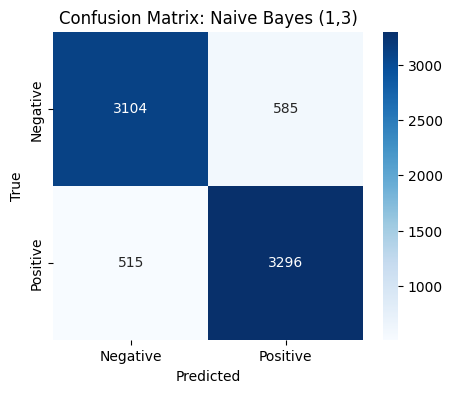


 Entrenando Logistic Regression con n-grams (1,3)

Classification Report:
              precision    recall  f1-score   support

    Negative       0.89      0.88      0.89      3689
    Positive       0.89      0.90      0.89      3811

    accuracy                           0.89      7500
   macro avg       0.89      0.89      0.89      7500
weighted avg       0.89      0.89      0.89      7500



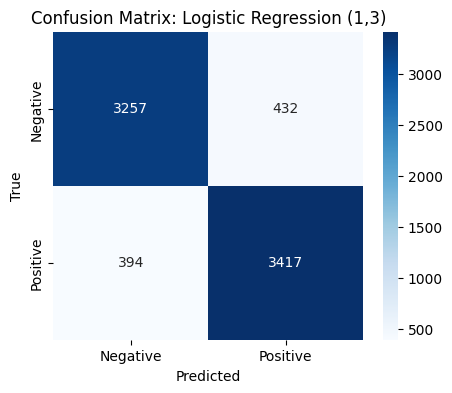


 Entrenando SVM con n-grams (1,3)

Classification Report:
              precision    recall  f1-score   support

    Negative       0.88      0.88      0.88      3689
    Positive       0.88      0.88      0.88      3811

    accuracy                           0.88      7500
   macro avg       0.88      0.88      0.88      7500
weighted avg       0.88      0.88      0.88      7500



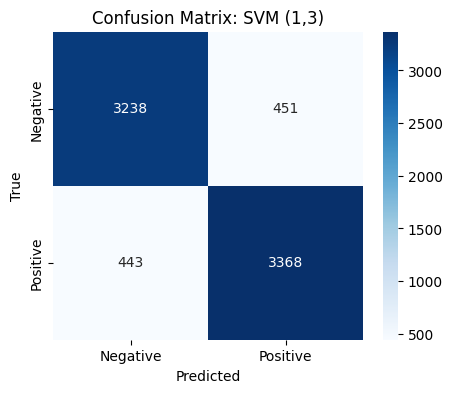

                 Model N-grams  Accuracy  Precision    Recall  F1-score
0          Naive Bayes   (1,3)  0.853333   0.849266  0.864865  0.856994
1  Logistic Regression   (1,3)  0.889867   0.887763  0.896615  0.892167
2                  SVM   (1,3)  0.880800   0.881906  0.883758  0.882831


In [6]:
def train_and_evaluate_models(X_train, X_val, y_train, y_val, ngram_label="(1,3)"):
    models = {
        'Naive Bayes': MultinomialNB(),
        'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
        'SVM': LinearSVC(random_state=42)
    }

    results = []
    
    for name, model in models.items():
        print(f"\n Entrenando {name} con n-grams {ngram_label}")

        # Training
        model.fit(X_train, y_train)

        # Predictions
        y_pred = model.predict(X_val)

        # Métricas
        accuracy = accuracy_score(y_val, y_pred)
        precision = precision_score(y_val, y_pred, average="binary")
        recall = recall_score(y_val, y_pred, average="binary")
        f1 = f1_score(y_val, y_pred, average="binary")

        # Classification Report
        print("\nClassification Report:")
        print(classification_report(y_val, y_pred, target_names=["Negative", "Positive"]))

        # Confusion matrix
        cm = confusion_matrix(y_val, y_pred)
        plt.figure(figsize=(5,4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=["Negative", "Positive"],
                    yticklabels=["Negative", "Positive"])
        plt.title(f"Confusion Matrix: {name} {ngram_label}")
        plt.xlabel("Predicted")
        plt.ylabel("True")
        plt.show()

        results.append({
            'Model': name,
            'N-grams': ngram_label,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-score': f1
        })
    
    results_df = pd.DataFrame(results)
    return results_df

results = train_and_evaluate_models(X_train_comb, X_val_comb, y_train, y_val, ngram_label="(1,3)")
print(results)

### Evaluate on the validation set and compare n-gram sizes


 Entrenando Naive Bayes con n-grams (1,1)

Classification Report:
              precision    recall  f1-score   support

    Negative       0.84      0.85      0.85      3689
    Positive       0.85      0.85      0.85      3811

    accuracy                           0.85      7500
   macro avg       0.85      0.85      0.85      7500
weighted avg       0.85      0.85      0.85      7500



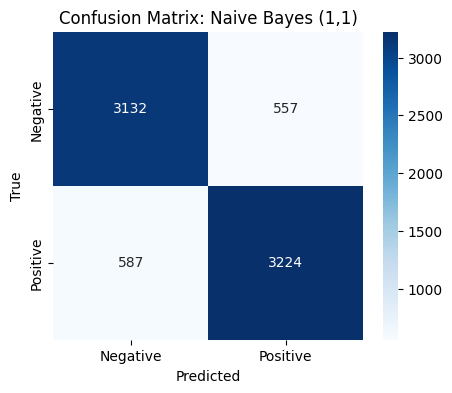


 Entrenando Logistic Regression con n-grams (1,1)

Classification Report:
              precision    recall  f1-score   support

    Negative       0.89      0.88      0.88      3689
    Positive       0.88      0.89      0.89      3811

    accuracy                           0.89      7500
   macro avg       0.89      0.89      0.89      7500
weighted avg       0.89      0.89      0.89      7500



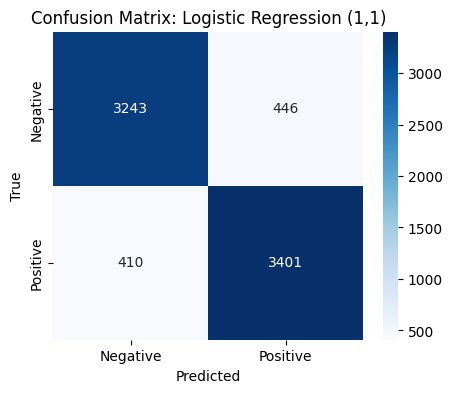


 Entrenando SVM con n-grams (1,1)

Classification Report:
              precision    recall  f1-score   support

    Negative       0.88      0.88      0.88      3689
    Positive       0.88      0.88      0.88      3811

    accuracy                           0.88      7500
   macro avg       0.88      0.88      0.88      7500
weighted avg       0.88      0.88      0.88      7500



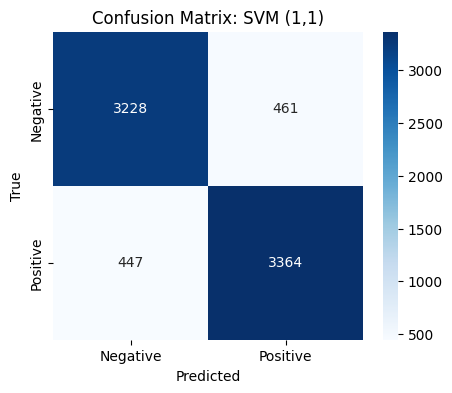

In [7]:
# Unigram
X_train_uni, X_val_uni, X_test_uni, vec_uni = extract_features(X_train, X_val, X_test, ngram_range=(1,1), use_tfidf=True)
results_uni = train_and_evaluate_models(X_train_uni, X_val_uni, y_train, y_val, ngram_label="(1,1)")


 Entrenando Naive Bayes con n-grams (1,2)

Classification Report:
              precision    recall  f1-score   support

    Negative       0.86      0.84      0.85      3689
    Positive       0.85      0.86      0.86      3811

    accuracy                           0.85      7500
   macro avg       0.85      0.85      0.85      7500
weighted avg       0.85      0.85      0.85      7500



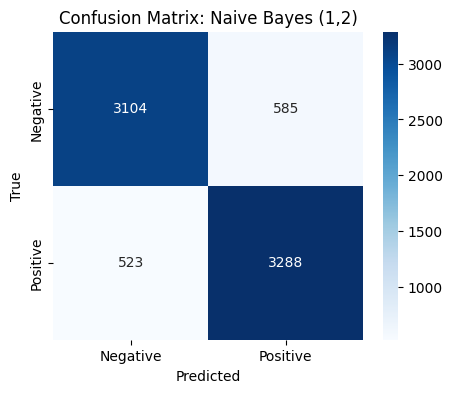


 Entrenando Logistic Regression con n-grams (1,2)

Classification Report:
              precision    recall  f1-score   support

    Negative       0.89      0.88      0.89      3689
    Positive       0.89      0.90      0.89      3811

    accuracy                           0.89      7500
   macro avg       0.89      0.89      0.89      7500
weighted avg       0.89      0.89      0.89      7500



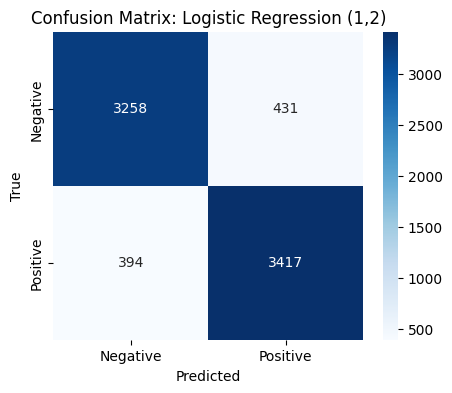


 Entrenando SVM con n-grams (1,2)

Classification Report:
              precision    recall  f1-score   support

    Negative       0.88      0.88      0.88      3689
    Positive       0.88      0.88      0.88      3811

    accuracy                           0.88      7500
   macro avg       0.88      0.88      0.88      7500
weighted avg       0.88      0.88      0.88      7500



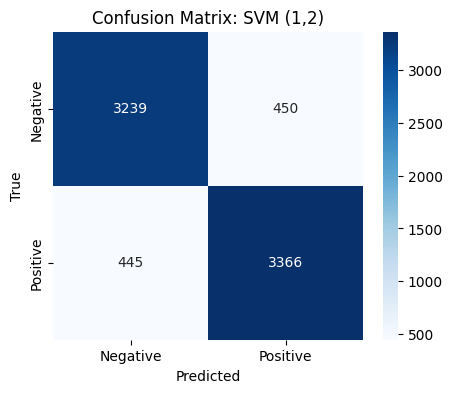

In [8]:
# Bigram
X_train_bi, X_val_bi, X_test_bi, vec_bi = extract_features(X_train, X_val, X_test, ngram_range=(1,2), use_tfidf=True)
results_bi = train_and_evaluate_models(X_train_bi, X_val_bi, y_train, y_val, ngram_label="(1,2)")


 Entrenando Naive Bayes con n-grams (1,3)

Classification Report:
              precision    recall  f1-score   support

    Negative       0.86      0.84      0.85      3689
    Positive       0.85      0.86      0.86      3811

    accuracy                           0.85      7500
   macro avg       0.85      0.85      0.85      7500
weighted avg       0.85      0.85      0.85      7500



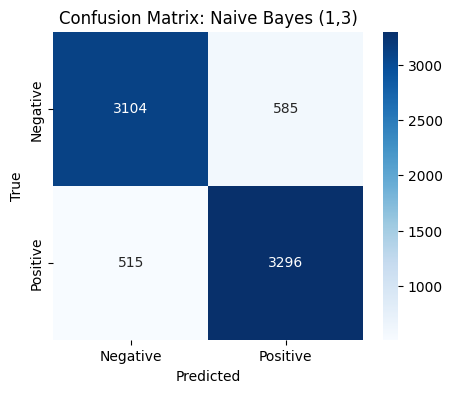


 Entrenando Logistic Regression con n-grams (1,3)

Classification Report:
              precision    recall  f1-score   support

    Negative       0.89      0.88      0.89      3689
    Positive       0.89      0.90      0.89      3811

    accuracy                           0.89      7500
   macro avg       0.89      0.89      0.89      7500
weighted avg       0.89      0.89      0.89      7500



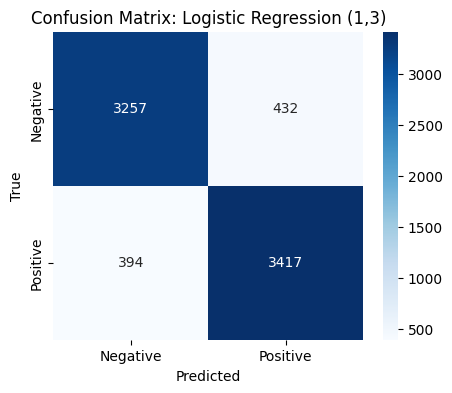


 Entrenando SVM con n-grams (1,3)

Classification Report:
              precision    recall  f1-score   support

    Negative       0.88      0.88      0.88      3689
    Positive       0.88      0.88      0.88      3811

    accuracy                           0.88      7500
   macro avg       0.88      0.88      0.88      7500
weighted avg       0.88      0.88      0.88      7500



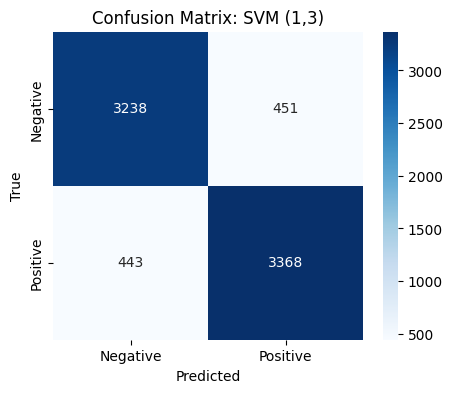

In [9]:
# Trigram
X_train_tri, X_val_tri, X_test_tri, vec_tri = extract_features(X_train, X_val, X_test, ngram_range=(1,3), use_tfidf=True)
results_tri = train_and_evaluate_models(X_train_tri, X_val_tri, y_train, y_val, ngram_label="(1,3)")

### Error analysis

In [22]:
def error_analysis(model, X_val_vec, y_val, X_val_raw, n=10):
    """
    Muestra algunos ejemplos de errores del modelo.
    
    model: modelo entrenado
    X_val_vec: validación vectorizada
    y_val: etiquetas reales
    X_val_raw: textos originales (no vectorizados)
    n: número de ejemplos a mostrar
    """
    y_pred = model.predict(X_val_vec)
    errors = []

    for text, true, pred in zip(X_val_raw, y_val, y_pred):
        if true != pred:
            errors.append((text, true, pred))

    # Pasar a DataFrame para inspección más fácil
    errors_df = pd.DataFrame(errors, columns=["review", "true_label", "pred_label"])

    return errors_df.sample(n)  # muestra n ejemplos aleatorios

#### Ejemplo de análisis de errores con el mejor modelo

In [29]:
# Logistic Regression con n-grams (1,3)
best_model = LogisticRegression(max_iter=1000, random_state=42)
best_model.fit(X_train_comb, y_train)
errors_logreg = error_analysis(best_model, X_val_comb, y_val, X_val, n=10)
print(errors_logreg)

                                                review  true_label  pred_label
823  anyone may know oneactor movie like best examp...           1           0
255  understand lelands character u likely inborn s...           1           0
726  hard criticize anything mitzi kapture radiates...           1           0
669  clara bow hula calhoun daughter plantation own...           1           0
214  forget easy rider head film salmost laugh monk...           1           0
531  movie way slow predictablei wish could say can...           0           1
242  nothing like seen tv time probably never first...           1           0
444  something think people miss great science fict...           1           0
652  liked best flick chance see joan woodbury awes...           0           1
554  caught recently noticing james earl jones name...           1           0


_Más falsos negativos (pierde reseñas positivas)_

In [33]:
# Naive Bayes con n-grams (1,3)
nb_model = MultinomialNB()
nb_model.fit(X_train_comb, y_train)

errores_nb = error_analysis(
    nb_model, 
    X_val_comb, y_val, 
    X_val, n=10
)

print(errores_nb)


                                                review  true_label  pred_label
136  roger spottiswoode isnt worst director good jo...           0           1
62   lot films ive made probably could worked well ...           0           1
168  stephen king raised flicks like flicks filmsmo...           1           0
286  movie different jimmy cangeys films done warne...           0           1
491  days home video stan laurels prehardy comedy k...           0           1
952  family guy seasons far say vol biggest disappo...           1           0
855  siskel ebert terrific show whether agreed genu...           0           1
863  obviously low budget film shows every scene ni...           0           1
360  would probably best word describe film opinion...           1           0
333  get past message movie laid much clearly ignor...           0           1


_Más falsos positivos (clasifica negativas como positivas por unas cuantas palabras optimistas)_

In [34]:
# SVM con n-grams (1,3)
svm_model = LinearSVC(random_state=42)
svm_model.fit(X_train_comb, y_train)    
errores_svm = error_analysis(
    svm_model, 
    X_val_comb, y_val, 
    X_val, n=10
)
print(errores_svm)

                                                review  true_label  pred_label
724  remember waiting born vision quest american we...           0           1
765  family guy seasons far say vol biggest disappo...           1           0
24   fairly enjoyable kidnapping caper set new orle...           1           0
7    like one previous commenters said foundations ...           1           0
27   another film cinematography best thing recomme...           1           0
383  wasnt planning watching wasted saw mtv preview...           1           0
619  hitting international acclaim silence lambs di...           0           1
410  every time watch show want turn curse makers w...           1           0
310  seen rik mayall blackadder new statesman thoug...           0           1
836  cheapo remake terrific five star final suffers...           1           0


_Mejor equilibrio, pero falla en matices como sarcasmo y combinaciones de tono_